In [7]:
# import necessary libraries
import os, sys, glob
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm
from PIL import Image
from importlib import reload # when you make changes to a .py, force reload imports


# custom imports
sys.path.append('../')

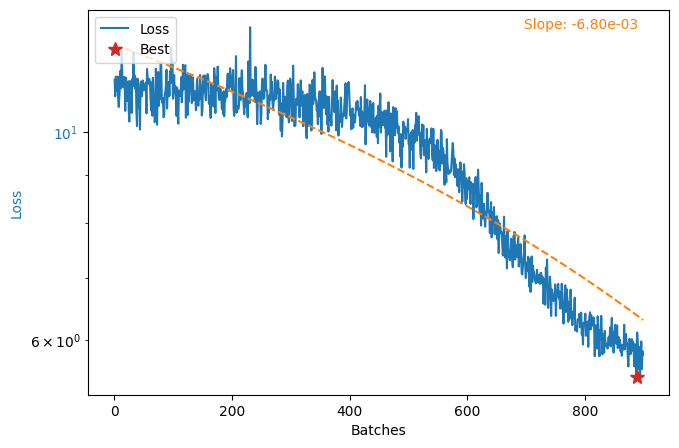

In [23]:
# parse logs
logs = []
with open('../logs/log.csv', 'r') as f:
    logs = f.readlines()
    logs = [l.strip() for l in logs][1:]
logs = [l.split(',') for l in logs]
logs = np.array(logs).astype(float)
epochs, iterations, loss = logs.T
iterations = iterations.astype(int)

iters = np.arange(0, iterations.max(), 100)
# get best model
best_iter = iterations[np.argmin(loss)]

# plot
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

# losses
ax.semilogy(iterations, loss, '-', color='tab:blue', label='Loss')
ax.semilogy(best_iter, min(loss), '*', color='tab:red', label='Best', markersize=10)
ax.set_ylabel('Loss', color='tab:blue')
ax.set_xlabel('Batches')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax.legend(loc='upper left')
m, b = np.polyfit(iterations, loss, 1)
ax.plot(iterations, m*iterations + b, '--', color='tab:orange')
ax.text(0.75, 0.95, f'Slope: {m:.2e}', transform=ax.transAxes, color='tab:orange')
plt.show()

In [13]:
m

-1.975068102273989e-07